# Bayesian Analysis of Layoffs data
## Introduction

### I have a question
In this notebook I ask the dataset a question. What are the factors that might lead to a company laying off part of its employees? Is it a negative growth? Is it a negative S&P 500 MA? Is it industry related? Let's see what data has to answer.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import arviz as az

layoffs = pd.read_excel("/content/drive/MyDrive/OMSCS/ISYE6420/Project/layoffs_with_sp.xlsx")
private_companies = pd.read_excel("/content/drive/MyDrive/OMSCS/ISYE6420/Project/private_companies.xlsx")
public_companies = pd.read_excel("/content/drive/MyDrive/OMSCS/ISYE6420/Project/public_companies.xlsx")
negative_private_samples = pd.read_excel("/content/drive/MyDrive/OMSCS/ISYE6420/Project/negative_private_samples.xlsx")
negative_public_samples = pd.read_excel("/content/drive/MyDrive/OMSCS/ISYE6420/Project/negative_public_companies.xlsx")

In [3]:
layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,sp_change_30_days,sp_change_180_days,sp_change_365_days
0,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0,0.076358,0.014869,-0.154610
1,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0,0.085314,0.017343,-0.147576
2,Nuro,SF Bay Area,Transportation,300.0,0.20,2022-11-18,Series D,United States,2100.0,0.085314,0.017343,-0.147576
3,Kavak,Sao Paulo,Transportation,NaN,NaN,2022-11-18,Series E,Brazil,1600.0,0.085314,0.017343,-0.147576
4,Metaplex,Chicago,Crypto,NaN,NaN,2022-11-18,Unknown,United States,NaN,0.085314,0.017343,-0.147576


In [4]:
layoffs.describe()

,total_laid_off,percentage_laid_off,funds_raised,sp_change_30_days,sp_change_180_days,sp_change_365_days
count,1175.000000,1105.000000,1536.000000,1651.000000,1651.000000,1651.000000
mean,198.280851,0.275084,890.692250,-0.012813,-0.088111,-0.057382
std,577.925257,0.265498,6531.112507,0.107550,0.089309,0.102903
min,3.000000,0.000000,0.000000,-0.339250,-0.252151,-0.216289
25%,31.000000,0.100000,42.000000,-0.070374,-0.153382,-0.119694
50%,70.000000,0.190000,129.000000,-0.000463,-0.089186,-0.076245
75%,150.000000,0.320000,375.250000,0.061036,-0.050585,-0.020485
max,11000.000000,1.000000,121900.000000,0.251144,0.466461,0.709643


In [5]:
private_companies.head()

,Categories,Founded Date,Founders,Funding Status,Number of Employees,Announced Date,Funding Type,Money Raised,Total Investors,Lead Investors,company
0,"Automotive,E-Commerce,E-Commerce Platforms,Onl...",2016,"Carlos Julio Garcia,Loreanne Garcia,Roger Laug...",Late Stage Venture,1001-5000,"Sep 15, 2022",Debt Financing,"$810,000,000",3.0,HSBC,Kavak
1,"Media and Entertainment,Music,News,Software,Vi...","May 1, 2009",Joel Holland,M&A,51-100,"Jun 3, 2015",Debt Financing,"$8,000,000",1.0,NaN,StoryBlocks
2,"B2B,Internet,Marketplace",1998,NaN,Early Stage Venture,1001-5000,"Jan 21, 2000",Series B,"$55,000,000",6.0,TH Lee Putnam Ventures,Homepoint
3,"B2B,Enterprise Software,Meeting Software,Produ...",2016,"Alina Vandenberghe,Ivan Diachenko,Nicolas Vand...",Early Stage Venture,251-500,"May 1, 2021",Secondary Market,NaN,1.0,NaN,Chili Piper
4,"Banking,Collaboration,Finance,Financial Services",2017,"Gil Mandelzis,Igor Teleshevsky,Thomas Glocer",Late Stage Venture,101-250,"Mar 22, 2022",Series D,"$110,000,000",11.0,"9Yards Capital,Canapi Ventures,SVB Capital",Capitolis


In [6]:
private_companies.describe()

,Total Investors
count,880.000000
mean,4.542045
std,4.134051
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,30.000000


In [7]:
negative_private_samples.head()

,Categories,Founded Date,Founders,Funding Status,Number of Employees,Announced Date,Funding Type,Money Raised,Total Investors,Lead Investors,company,date,sp_change_30_days,sp_change_180_days,sp_change_365_days
0,"E-Commerce,Finance,Internet","Apr 28, 2021",Kennan Davison,Seed,11-50,"Dec 23, 2021",Seed,"$7,200,000",8.0,Adjacent,Skio,2020-04-01,-0.118207,-0.117609,-0.073296
1,"Consumer,Enterprise Software,Venture Capital",Oct 1965,"Bill Elfers,Daniel Gregory",NaN,101-250,NaN,NaN,NaN,NaN,NaN,Greylock,2020-04-01,-0.118207,-0.117609,-0.073296
2,"Consumer,Mobile Apps",2020,"Dom Wong,Oskar Melking,Shikhar Mohan",Seed,11-50,"Jul 26, 2022",Seed,"$12,300,000",33.0,Buckley Ventures,Pogo,2020-04-01,-0.118207,-0.117609,-0.073296
3,"Apps,Mobile Apps,Social Media,Software",2013,"Ashutosh Priyadarshy,Travis Meyer",Seed,1-10,"Mar 18, 2019",Seed,"$150,000",4.0,Y Combinator,Sunsama,2020-04-01,-0.118207,-0.117609,-0.073296
4,"Blockchain,Ethereum,Internet,Software",2018,"Alex Gluchowski,Alexandr Vlasov",Late Stage Venture,1-10,"Nov 16, 2022",Series C,"$200,000,000",5.0,"Blockchain Capital,Dragonfly",Matter Labs,2020-04-01,-0.118207,-0.117609,-0.073296


In [8]:
negative_private_samples.describe()

,Total Investors,sp_change_30_days,sp_change_180_days,sp_change_365_days
count,1754.000000,1.888000e+03,1888.000000,1888.000000
mean,5.372862,-1.182069e-01,-0.117609,-0.073296
std,4.716863,1.388146e-17,0.000000,0.000000
min,1.000000,-1.182069e-01,-0.117609,-0.073296
25%,2.000000,-1.182069e-01,-0.117609,-0.073296
50%,4.000000,-1.182069e-01,-0.117609,-0.073296
75%,7.000000,-1.182069e-01,-0.117609,-0.073296
max,68.000000,-1.182069e-01,-0.117609,-0.073296


In [9]:
public_companies.head()

,fullTimeEmployees,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,earningsQuarterlyGrowth,payoutRatio,company,ticker
0,4204.0,-0.15918,0.622,-0.32830,NaN,6.529,-0.05679,-0.04769,-2.27,NaN,NaN,NaN,0.0,Zomato,ZOMATO.NS
1,21000.0,-0.05992,-0.027,-0.07775,NaN,2.380,-0.09420,-3.02218,-7.41,3.18,2.467899,NaN,0.0,Carvana,CVNA
2,23.0,-0.57453,-0.047,-0.59422,NaN,12.787,-0.12145,-0.20469,0.40,0.19,2.281828,NaN,0.0,Nuro,NURO
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metaplex,MPLX-USD
4,3000.0,-0.07588,0.120,-0.08184,NaN,3.149,-0.03849,-0.08683,-4.00,1.32,1.653608,NaN,0.0,Roku,ROKU


In [10]:
public_companies.describe()

,fullTimeEmployees,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,earningsQuarterlyGrowth,payoutRatio
count,3.270000e+02,369.000000,332.000000,369.000000,82.000000,358.000000,344.000000,311.000000,281.000000,266.000000,249.000000,85.000000,354.000000
mean,1.310590e+04,0.624265,1.268916,-222.422589,0.448598,4.721039,-0.138718,-0.906458,2.747117,5.771880,2.428167,0.575282,0.065262
std,8.881302e+04,16.384614,14.885904,4000.952467,1.895878,14.067826,0.393250,4.276283,29.311348,8.026151,19.760606,2.968827,0.220656
min,2.000000e+00,-2.994890,-0.991000,-76760.055000,-0.987000,0.003000,-3.758740,-52.905983,-29.300000,0.000000,-53.882828,-0.987000,0.000000
25%,3.295000e+02,-0.334260,-0.001250,-0.524340,-0.315000,1.125000,-0.183790,-0.575475,-0.600000,2.185000,0.881426,-0.313000,0.000000
50%,1.311000e+03,-0.021380,0.167000,-0.103840,0.085500,1.986000,-0.053910,-0.181370,0.020000,4.080000,1.269870,0.073000,0.000000
75%,4.400000e+03,0.029550,0.472000,0.051240,0.733750,4.372000,0.021368,0.058055,1.030000,6.622500,1.682263,0.734000,0.000000
max,1.544000e+06,314.204830,270.791000,1.210250,11.851000,231.408000,0.582850,1.785130,464.160000,98.010000,300.074800,24.607000,2.265600


In [11]:
negative_public_samples.head()

,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,earningsQuarterlyGrowth,payoutRatio,company,ticker,industry,fullTimeEmployees,date,sp_change_30_days,sp_change_180_days,sp_change_365_days
0,0.00000,NaN,0.00000,NaN,1.192,NaN,NaN,NaN,0.32,NaN,NaN,NaN,Banner Acquisition Corp.,BNNRU,Shell Companies,NaN,2020-04-01,-0.118207,-0.117609,-0.073296
1,0.00000,1.333,-6.77386,NaN,1.329,-1.29010,-7.91133,-0.54,0.85,1.229234,NaN,0.0000,"Agile Therapeutics, Inc.",AGRX,Drug Manufacturers—Specialty & Generic,30.0,2020-04-01,-0.118207,-0.117609,-0.073296
2,0.03246,0.340,0.04722,0.285,1.600,0.05137,0.13697,6.81,3.05,1.013057,0.144,0.0000,Sanmina Corporation,SANM,Electronic Components,34000.0,2020-04-01,-0.118207,-0.117609,-0.073296
3,0.17933,0.100,0.23591,0.133,0.969,0.04681,0.76380,9.02,3.63,0.826260,0.112,0.5762,"Automatic Data Processing, Inc.",ADP,Staffing & Employment Services,60000.0,2020-04-01,-0.118207,-0.117609,-0.073296
4,-0.25687,-0.326,-0.16158,NaN,3.396,-0.06832,-1.22250,-0.15,11.55,1.079437,NaN,0.0000,"Casa Systems, Inc.",CASA,Communication Equipment,1004.0,2020-04-01,-0.118207,-0.117609,-0.073296


In [12]:
negative_public_samples.describe()

,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,earningsQuarterlyGrowth,payoutRatio,fullTimeEmployees,sp_change_30_days,sp_change_180_days,sp_change_365_days
count,1735.000000,1218.000000,1735.000000,536.000000,1546.000000,1394.000000,1316.000000,1100.000000,1705.00000,1142.000000,552.000000,1435.000000,1.356000e+03,1735.000000,1.735000e+03,1.735000e+03
mean,0.026001,115.558382,7.589628,193.365987,6.218918,-0.117564,-0.519674,1.340291,4.59583,1.510493,2348.609152,0.116898,5.119459e+03,-0.118207,-1.176086e-01,-7.329594e-02
std,2.751278,3883.145840,695.431231,2829.905181,22.331246,0.291961,2.817998,5.723028,7.86110,114.831774,27650.022849,0.559099,4.648533e+04,0.000000,1.388179e-17,1.388179e-17
min,-2.979810,-1.000000,-2486.570000,-0.997000,0.000000,-3.812850,-59.187970,-15.600000,0.00000,-2513.732200,-0.990000,0.000000,1.000000e+00,-0.118207,-1.176086e-01,-7.329594e-02
25%,-0.023820,-0.028000,-0.272990,-0.310000,1.228250,-0.211865,-0.531590,-0.600000,0.79000,0.710577,-0.295250,0.000000,8.600000e+01,-0.118207,-1.176086e-01,-7.329594e-02
50%,0.000000,0.125000,0.000000,0.024000,2.421000,-0.010480,-0.051635,0.350000,2.89000,1.089898,0.039000,0.000000,3.905000e+02,-0.118207,-1.176086e-01,-7.329594e-02
75%,0.074400,0.384500,0.112215,0.379750,5.469500,0.028835,0.114575,2.042500,5.97000,1.492761,0.448250,0.000000,1.860000e+03,-0.118207,-1.176086e-01,-7.329594e-02
max,86.107956,135494.580000,28685.385000,45664.500000,652.170000,0.631220,9.895679,94.630000,217.50000,2954.209200,474189.340000,11.428600,1.608000e+06,-0.118207,-1.176086e-01,-7.329594e-02


## Organizing Layoffs data
We have multiple reports per company in the case of having multiple layoff events.

Let's relax this assumption and aggregate these events into one event and assume the full impact.

In [13]:
layoffs = layoffs.groupby("company").agg({
    "location": lambda x: x.iloc[0],
    "industry": lambda x: x.iloc[0],
    "total_laid_off": "sum",
    "percentage_laid_off": "sum",
    "date": lambda x: x.iloc[0],
    "stage": lambda x: x.iloc[0],
    "country": lambda x: x.iloc[0],
    "funds_raised": lambda x: x.iloc[0],
    "sp_change_30_days": lambda x: x.iloc[0],
    "sp_change_180_days": lambda x: x.iloc[0],
    "sp_change_365_days": lambda x: x.iloc[0],
})

## Create 2 datasets, private companies, and public companies
But first, let's get rid of some items that might be wrong

1. If we don't have the number of full time employees, we skip.
2. If we don't have the percentage of laid off, we skip (This is to decrease our data and it will be easier to predict a percentage)

### Clean public companies

In [14]:
public_companies.describe()

,fullTimeEmployees,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,earningsQuarterlyGrowth,payoutRatio
count,3.270000e+02,369.000000,332.000000,369.000000,82.000000,358.000000,344.000000,311.000000,281.000000,266.000000,249.000000,85.000000,354.000000
mean,1.310590e+04,0.624265,1.268916,-222.422589,0.448598,4.721039,-0.138718,-0.906458,2.747117,5.771880,2.428167,0.575282,0.065262
std,8.881302e+04,16.384614,14.885904,4000.952467,1.895878,14.067826,0.393250,4.276283,29.311348,8.026151,19.760606,2.968827,0.220656
min,2.000000e+00,-2.994890,-0.991000,-76760.055000,-0.987000,0.003000,-3.758740,-52.905983,-29.300000,0.000000,-53.882828,-0.987000,0.000000
25%,3.295000e+02,-0.334260,-0.001250,-0.524340,-0.315000,1.125000,-0.183790,-0.575475,-0.600000,2.185000,0.881426,-0.313000,0.000000
50%,1.311000e+03,-0.021380,0.167000,-0.103840,0.085500,1.986000,-0.053910,-0.181370,0.020000,4.080000,1.269870,0.073000,0.000000
75%,4.400000e+03,0.029550,0.472000,0.051240,0.733750,4.372000,0.021368,0.058055,1.030000,6.622500,1.682263,0.734000,0.000000
max,1.544000e+06,314.204830,270.791000,1.210250,11.851000,231.408000,0.582850,1.785130,464.160000,98.010000,300.074800,24.607000,2.265600


In [15]:
public_companies = public_companies.join(layoffs, on="company", how="left")

In [16]:
# public_companies_trimmed = public_companies[~public_companies.fullTimeEmployees.isna()]
public_companies_trimmed = public_companies.dropna(subset=["fullTimeEmployees", "percentage_laid_off"])
public_companies_trimmed.set_index("company", inplace=True)

In [17]:
public_companies_trimmed

,fullTimeEmployees,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,...,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,sp_change_30_days,sp_change_180_days,sp_change_365_days
company,,,,,,,,,,,,,,,,,,,,,
Zomato,4204.0,-0.15918,0.622,-0.32830,NaN,6.529,-0.05679,-0.04769,-2.27,NaN,...,Food,620.0,0.17,2022-11-19,Series J,India,914.0,0.076358,0.014869,-0.154610
Carvana,21000.0,-0.05992,-0.027,-0.07775,NaN,2.380,-0.09420,-3.02218,-7.41,3.18,...,Transportation,4000.0,0.20,2022-11-18,IPO,United States,1600.0,0.085314,0.017343,-0.147576
Nuro,23.0,-0.57453,-0.047,-0.59422,NaN,12.787,-0.12145,-0.20469,0.40,0.19,...,Transportation,307.0,0.20,2022-11-18,Series D,United States,2100.0,0.085314,0.017343,-0.147576
Roku,3000.0,-0.07588,0.120,-0.08184,NaN,3.149,-0.03849,-0.08683,-4.00,1.32,...,Media,200.0,0.07,2022-11-17,IPO,United States,208.0,0.104430,-0.032185,-0.154939
Orchard,259.0,0.00000,3.846,-8.05677,NaN,3.566,-0.27584,-0.98150,-0.69,1.58,...,Real Estate,180.0,0.10,2022-11-17,Series D,United States,472.0,0.104430,-0.032185,-0.154939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Opal,273.0,0.08968,0.586,0.05831,NaN,1.046,NaN,NaN,NaN,5.97,...,Marketing,20.0,0.00,2020-03-27,Series B,United States,25.0,-0.241347,-0.180088,-0.125441
Lyric,6496.0,0.09393,0.952,0.10907,0.96,1.293,0.03918,0.15787,NaN,NaN,...,Real Estate,100.0,0.00,2020-03-25,Series B,United States,179.1,-0.336719,-0.252151,-0.201131
Service,4427.0,0.45158,0.439,0.57981,0.50,1.641,0.58285,1.78513,19.06,2.87,...,Travel,0.0,2.00,2020-03-20,Seed,United States,5.0,-0.249563,-0.158824,-0.107221


In [18]:
negative_public_samples_trimmed = negative_public_samples[(~negative_public_samples.fullTimeEmployees.isna()) & (~negative_public_samples.company.isna())]
negative_public_samples_trimmed.set_index("company", inplace=True)
negative_public_samples_trimmed["total_laid_off"] = 0
negative_public_samples_trimmed["percentage_laid_off"] = 0

<ipython-input-18-b544a32c3d70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_public_samples_trimmed["total_laid_off"] = 0
<ipython-input-18-b544a32c3d70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_public_samples_trimmed["percentage_laid_off"] = 0


In [19]:
all_public_companies = pd.concat((negative_public_samples_trimmed, public_companies_trimmed))
print(len(all_public_companies))

1679


### Clean private companies

In [20]:
private_companies.head()

,Categories,Founded Date,Founders,Funding Status,Number of Employees,Announced Date,Funding Type,Money Raised,Total Investors,Lead Investors,company
0,"Automotive,E-Commerce,E-Commerce Platforms,Onl...",2016,"Carlos Julio Garcia,Loreanne Garcia,Roger Laug...",Late Stage Venture,1001-5000,"Sep 15, 2022",Debt Financing,"$810,000,000",3.0,HSBC,Kavak
1,"Media and Entertainment,Music,News,Software,Vi...","May 1, 2009",Joel Holland,M&A,51-100,"Jun 3, 2015",Debt Financing,"$8,000,000",1.0,NaN,StoryBlocks
2,"B2B,Internet,Marketplace",1998,NaN,Early Stage Venture,1001-5000,"Jan 21, 2000",Series B,"$55,000,000",6.0,TH Lee Putnam Ventures,Homepoint
3,"B2B,Enterprise Software,Meeting Software,Produ...",2016,"Alina Vandenberghe,Ivan Diachenko,Nicolas Vand...",Early Stage Venture,251-500,"May 1, 2021",Secondary Market,NaN,1.0,NaN,Chili Piper
4,"Banking,Collaboration,Finance,Financial Services",2017,"Gil Mandelzis,Igor Teleshevsky,Thomas Glocer",Late Stage Venture,101-250,"Mar 22, 2022",Series D,"$110,000,000",11.0,"9Yards Capital,Canapi Ventures,SVB Capital",Capitolis


For private companies we could:

1. Get rid of companies without any "Money Raised" data
2. Get rid of companies without number of employees
3. Use one of the categories instead of this comma separated list
4. Only use data with percentage laid off

In [21]:
private_companies = private_companies.join(layoffs, on="company", how="left")

In [22]:
# private_companies_trimmed = private_companies[(~private_companies["Number of Employees"].isna()) & (~private_companies["Money Raised"].isna())]
private_companies_trimmed = private_companies.dropna(subset=["Number of Employees", "Money Raised", "percentage_laid_off"])
private_companies_trimmed.set_index("company", inplace=True)
private_companies_trimmed["Money Raised"] = private_companies_trimmed["Money Raised"].str.replace("[^0-9]", "", regex=True).astype(int)
private_companies_trimmed["Categories"] = private_companies_trimmed["Categories"].apply(lambda x: x.split(",")[0])
private_companies_trimmed.head()

<ipython-input-22-48254ae5663d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_companies_trimmed["Money Raised"] = private_companies_trimmed["Money Raised"].str.replace("[^0-9]", "", regex=True).astype(int)
<ipython-input-22-48254ae5663d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_companies_trimmed["Categories"] = private_companies_trimmed["Categories"].apply(lambda x: x.split(",")[0])


,Categories,Founded Date,Founders,Funding Status,Number of Employees,Announced Date,Funding Type,Money Raised,Total Investors,Lead Investors,...,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,sp_change_30_days,sp_change_180_days,sp_change_365_days
company,,,,,,,,,,,,,,,,,,,,,
Kavak,Automotive,2016,"Carlos Julio Garcia,Loreanne Garcia,Roger Laug...",Late Stage Venture,1001-5000,"Sep 15, 2022",Debt Financing,810000000,3.0,HSBC,...,Transportation,150.0,0.00,2022-11-18,Series E,Brazil,1600.0,0.085314,0.017343,-0.147576
StoryBlocks,Media and Entertainment,"May 1, 2009",Joel Holland,M&A,51-100,"Jun 3, 2015",Debt Financing,8000000,1.0,NaN,...,Media,0.0,0.00,2022-11-18,Acquired,United States,18.0,0.085314,0.017343,-0.147576
Homepoint,B2B,1998,NaN,Early Stage Venture,1001-5000,"Jan 21, 2000",Series B,55000000,6.0,TH Lee Putnam Ventures,...,Real Estate,113.0,0.00,2022-11-17,IPO,United States,NaN,0.104430,-0.032185,-0.154939
Capitolis,Banking,2017,"Gil Mandelzis,Igor Teleshevsky,Thomas Glocer",Late Stage Venture,101-250,"Mar 22, 2022",Series D,110000000,11.0,"9Yards Capital,Canapi Ventures,SVB Capital",...,Finance,37.0,0.25,2022-11-17,Series D,United States,281.0,0.104430,-0.032185,-0.154939
TealBook,Procurement,"Sep 8, 2014",Stephany Lapierre,Early Stage Venture,101-250,"Dec 14, 2021",Series B,40000000,12.0,Ten Coves Capital,...,Other,34.0,0.19,2022-11-17,Series B,Canada,73.0,0.104430,-0.032185,-0.154939


In [23]:
negative_private_samples_trimmed = negative_private_samples[(~negative_private_samples["Number of Employees"].isna()) & (~negative_private_samples["Money Raised"].isna())]
negative_private_samples_trimmed.set_index("company", inplace=True)
negative_private_samples_trimmed["total_laid_off"] = 0
negative_private_samples_trimmed["percentage_laid_off"] = 0
negative_private_samples_trimmed["Money Raised"] = negative_private_samples_trimmed["Money Raised"].str.replace("[^0-9]", "", regex=True).astype(int)
negative_private_samples_trimmed["Categories"] = negative_private_samples_trimmed["Categories"].apply(lambda x: x.split(",")[0])

<ipython-input-23-60d0b93155cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_private_samples_trimmed["total_laid_off"] = 0
<ipython-input-23-60d0b93155cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_private_samples_trimmed["percentage_laid_off"] = 0
<ipython-input-23-60d0b93155cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [24]:
all_private_companies = pd.concat((negative_private_samples_trimmed.sample(n=300), private_companies_trimmed.sample(n=300)))
print(len(all_private_companies))

600


### Handle categorical variables

In [25]:
all_public_companies.head()

,profitMargins,revenueGrowth,operatingMargins,earningsGrowth,currentRatio,returnOnAssets,returnOnEquity,forwardEps,shortRatio,beta,...,date,sp_change_30_days,sp_change_180_days,sp_change_365_days,total_laid_off,percentage_laid_off,location,stage,country,funds_raised
company,,,,,,,,,,,,,,,,,,,,,
"Agile Therapeutics, Inc.",0.00000,1.333,-6.77386,NaN,1.329,-1.29010,-7.91133,-0.54,0.85,1.229234,...,2020-04-01,-0.118207,-0.117609,-0.073296,0.0,0.0,NaN,NaN,NaN,NaN
Sanmina Corporation,0.03246,0.340,0.04722,0.285,1.600,0.05137,0.13697,6.81,3.05,1.013057,...,2020-04-01,-0.118207,-0.117609,-0.073296,0.0,0.0,NaN,NaN,NaN,NaN
"Automatic Data Processing, Inc.",0.17933,0.100,0.23591,0.133,0.969,0.04681,0.76380,9.02,3.63,0.826260,...,2020-04-01,-0.118207,-0.117609,-0.073296,0.0,0.0,NaN,NaN,NaN,NaN
"Casa Systems, Inc.",-0.25687,-0.326,-0.16158,NaN,3.396,-0.06832,-1.22250,-0.15,11.55,1.079437,...,2020-04-01,-0.118207,-0.117609,-0.073296,0.0,0.0,NaN,NaN,NaN,NaN
"Alector, Inc.",-1.02492,-0.919,-1.03720,NaN,4.817,-0.10209,-0.46347,-1.67,8.99,0.976413,...,2020-04-01,-0.118207,-0.117609,-0.073296,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
np.unique(all_public_companies.industry.tolist()\
                + all_private_companies.Categories.tolist())

array(['3D Printing', '3D Technology', 'A/B Testing', 'Accounting',
       'Ad Retargeting', 'Advanced Materials', 'Advertising',
       'Advertising Agencies', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Aerospace & Defense', 'Affiliate Marketing',
       'Agricultural Inputs', 'Agriculture', 'Airlines', 'Aluminum',
       'Analytics', 'Android', 'Apparel Manufacturing', 'Apparel Retail',
       'Application Performance Management', 'Apps',
       'Artificial Intelligence', 'Asset Management',
       'Auto & Truck Dealerships', 'Auto Insurance', 'Auto Manufacturers',
       'Auto Parts', 'Automotive', 'Autonomous Vehicles', 'B2B',
       'Banking', 'Banks—Diversified', 'Banks—Regional', 'Battery',
       'Beauty', 'Beverages—Non-Alcoholic',
       'Beverages—Wineries & Distilleries', 'Big Data', 'Billing',
       'Biotechnology', 'Bitcoin', 'Blockchain', 'Broadcasting',
       'Building Material', 'Building Materials',
       'Building Products & Equipment', 'Business Deve

Unfortunately, we have **a lot of categories** and it won't make any sense to introduce that much **sparsity** into our model.

I believe we have to **shrink** these categories.

The proper way to do that is to **map each category** to a more general parent category and control the number of parent categories in the data.

I think the categories in the layoffs make the most sense so I'll try to map to them.

In [27]:
categories_map = {
    "3D Printing": "Media",
    "3D Technology": "Media",
    "A/B Testing": "Media",
    "Accounting": "Finance",
    "Ad Network": "Marketing",
    "Ad Retargeting": "Marketing",
    "Advanced Materials": "Product",
    "Adventure Travel": "Travel",
    "Advertising": "Marketing",
    "Advertising Agencies": "Marketing",
    "Advertising Platforms": "Marketing",
    "Advice": "Support",
    "Aerospace": "Aerospace",
    "Aerospace & Defense": "Aerospace",
    "Affiliate Marketing": "Marketing",
    "AgTech": "Media",
    "Agricultural Inputs": "Other",
    "Agriculture": "Other",
    "Air Transportation": "Transportation",
    "Airlines": "Transportation",
    "Alternative Medicine": "Healthcare",
    "Aluminum": "Other",
    "Analytics": "Media",
    "Android": "Media",
    "Angel Investment": "Finance",
    "Animal Feed": "Logistics",
    "Animation": "Media",
    "Apparel Manufacturing": "Consumer",
    "Apparel Retail": "Retail",
    "Application Performance Management": "Media",
    "Application Specific Integrated Circuit (ASIC)": "Media",
    "Apps": "Consumer",
    "Architecture": "Media",
    "Art": "Media",
    "Artificial Intelligence": "Media",
    "Asset Management": "Finance",
    "Association": "Other",
    "Audio": "Media",
    "Augmented Reality": "Media",
    "Auto & Truck Dealerships": "Consumer",
    "Auto Insurance": "Consumer",
    "Auto Manufacturers": "Consumer",
    "Auto Parts": "Consumer",
    "Automotive": "Consumer",
    "Autonomous Vehicles": "Consumer",
    "B2B": "Retail",
    "Baby": "Other",
    "Bakery": "Consumer",
    "Banking": "Finance",
    "Banks—Diversified": "Other",
    "Banks—Regional": "Other",
    "Battery": "Consumer",
    "Beauty": "Consumer",
    "Beverages—Non-Alcoholic": "Consumer",
    "Beverages—Wineries & Distilleries": "Consumer",
    "Big Data": "Data",
    "Billing": "Finance",
    "Biofuel": "Energy",
    "Biometrics": "Healthcare",
    "Biopharma": "Healthcare",
    "Biotechnology": "Healthcare",
    "Bitcoin": "Crypto",
    "Blockchain": "Crypto",
    "Blogging Platforms": "Media",
    "Brand Marketing": "Marketing",
    "Brewing": "Consumer",
    "Broadcasting": "Media",
    "Browser Extensions": "Media",
    "Building Maintenance": "Consumer",
    "Building Material": "Consumer",
    "Building Materials": "Consumer",
    "Building Products & Equipment": "Consumer",
    "Business Development": "Other",
    "Business Information Systems": "Media",
    "Business Intelligence": "Media",
    "Business Travel": "Travel",
    "CMS": "Media",
    "CRM": "Media",
    "Call Center": "Support",
    "Cannabis": "Other",
    "Capital Markets": "Other",
    "Car Sharing": "Consumer",
    "Career Planning": "Other",
    "Casual Games": "Media",
    "Catering": "Logistics",
    "Cause Marketing": "Marketing",
    "Child Care": "Other",
    "Children": "Other",
    "CivicTech": "Media",
    "Civil Engineering": "Consumer",
    "Classifieds": "Media",
    "Clean Energy": "Energy",
    "CleanTech": "Media",
    "Clinical Trials": "Healthcare",
    "Cloud Computing": "Infrastructure",
    "Cloud Data Services": "Infrastructure",
    "Cloud Infrastructure": "Infrastructure",
    "Cloud Management": "Infrastructure",
    "Cloud Security": "Security",
    "Coffee": "Consumer",
    "Collaboration": "Other",
    "Collaborative Consumption": "Other",
    "Collectibles": "Other",
    "Comics": "Media",
    "Commercial": "Consumer",
    "Commercial Insurance": "Other",
    "Commercial Lending": "Finance",
    "Commercial Real Estate": "Real Estate",
    "Communication Equipment": "Consumer",
    "Communication Hardware": "Consumer",
    "Communications Infrastructure": "Infrastructure",
    "Communities": "Other",
    "Compliance": "Other",
    "Computer": "Media",
    "Computer Hardware": "Consumer",
    "Computer Vision": "Media",
    "Confectioners": "Other",
    "Conglomerates": "Other",
    "Console Games": "Consumer",
    "Construction": "Construction",
    "Consulting": "Other",
    "Consulting Services": "Other",
    "Consumer": "Consumer",
    "Consumer Applications": "Consumer",
    "Consumer Electronics": "Consumer",
    "Consumer Goods": "Consumer",
    "Consumer Lending": "Consumer",
    "Consumer Research": "Consumer",
    "Consumer Reviews": "Consumer",
    "Content": "Media",
    "Content Creators": "Media",
    "Content Delivery Network": "Infrastructure",
    "Content Marketing": "Marketing",
    "Continuing Education": "Education",
    "Corporate Training": "Other",
    "Coupons": "Product",
    "Courier Service": "Logistics",
    "Coworking": "Other",
    "Credit": "Finance",
    "Credit Cards": "Finance",
    "Credit Services": "Finance",
    "Crowdfunding": "Finance",
    "Crowdsourcing": "Finance",
    "Crypto": "Crypto",
    "Cryptocurrency": "Crypto",
    "Customer Service": "Support",
    "Cyber Security": "Security",
    "Cycling": "Fitness",
    "DIY": "Other",
    "Data": "Data",
    "Data Center": "Data",
    "Data Center Automation": "Data",
    "Data Integration": "Data",
    "Database": "Data",
    "Debt Collections": "Finance",
    "Delivery": "Logistics",
    "Delivery Service": "Logistics",
    "Dental": "Healthcare",
    "Developer APIs": "Media",
    "Developer Platform": "Media",
    "Developer Tools": "Media",
    "Diabetes": "Healthcare",
    "Diagnostics & Research": "Media",
    "Dietary Supplements": "Fitness",
    "Digital Entertainment": "Media",
    "Digital Marketing": "Marketing",
    "Digital Media": "Media",
    "Digital Signage": "Media",
    "Direct Sales": "Consumer",
    "Discount Stores": "Consumer",
    "Document Management": "Data",
    "Drone Management": "Product",
    "Drug Manufacturers—General": "Healthcare",
    "Drug Manufacturers—Specialty & Generic": "Healthcare",
    "E-Commerce": "Consumer",
    "E-Learning": "Education",
    "EdTech": "Education",
    "Ediscovery": "Education",
    "Education": "Education",
    "Education & Training Services": "Education",
    "Elder Care": "Other",
    "Electric Vehicle": "Consumer",
    "Electrical Equipment & Parts": "Consumer",
    "Electronic Components": "Consumer",
    "Electronic Gaming & Multimedia": "Media",
    "Electronic Health Record (EHR)": "Healthcare",
    "Electronics": "Consumer",
    "Electronics & Computer Distribution": "Retail",
    "Email": "Media",
    "Emergency Medicine": "Healthcare",
    "Employee Benefits": "HR",
    "Employment": "Recruiting",
    "Energy": "Energy",
    "Engineering & Construction": "Construction",
    "Enterprise": "Other",
    "Enterprise Resource Planning (ERP)": "Media",
    "Enterprise Software": "Media",
    "Entertainment": "Other",
    "Event Management": "Other",
    "Events": "Other",
    "Facility Management": "Real Estate",
    "Family": "Other",
    "Fantasy Sports": "Media",
    "Farm & Heavy Construction Machinery": "Consumer",
    "Farm Products": "Consumer",
    "Fashion": "Consumer",
    "Film Production": "Media",
    "FinTech": "Finance",
    "Finance": "Finance",
    "Financial Conglomerates": "Finance",
    "Financial Data & Stock Exchanges": "Finance",
    "Financial Exchanges": "Finance",
    "Financial Services": "Finance",
    "Fitness": "Fitness",
    "Fleet Management": "Logistics",
    "Food": "Food",
    "Food Distribution": "Logistics",
    "Food and Beverage": "Food",
    "Footwear & Accessories": "Consumer",
    "Freelance": "Other",
    "Freight Service": "Logistics",
    "Furnishings, Fixtures & Appliances": "Consumer",
    "Furniture": "Consumer",
    "GPS": "Media",
    "Gambling": "Other",
    "Gamification": "Media",
    "Gaming": "Media",
    "Genetics": "Healthcare",
    "Gold": "Consumer",
    "GovTech": "Media",
    "Graphic Design": "Media",
    "Grocery": "Consumer",
    "HR": "HR",
    "Hardware": "Consumer",
    "Health Care": "Healthcare",
    "Health Information Services": "Healthcare",
    "Health Insurance": "Healthcare",
    "Healthcare": "Healthcare",
    "Home Decor": "Consumer",
    "Home Improvement Retail": "Retail",
    "Home Services": "Retail",
    "Hospitality": "Travel",
    "Hotel": "Travel",
    "Household & Personal Products": "Consumer",
    "Human Resources": "HR",
    "Impact Investing": "Other",
    "Industrial": "Other",
    "Industrial Automation": "Other",
    "Industrial Distribution": "Other",
    "Industrial Engineering": "Other",
    "Industrial Manufacturing": "Other",
    "Information Services": "Media",
    "Information Technology": "Media",
    "Information Technology Services": "Media",
    "Information and Communications Technology (ICT)": "Media",
    "Infrastructure": "Infrastructure",
    "Insurance": "Finance",
    "Insurance Brokers": "Finance",
    "Insurance—Diversified": "Finance",
    "Insurance—Life": "Finance",
    "Insurance—Property & Casualty": "Finance",
    "Insurance—Reinsurance": "Finance",
    "Insurance—Specialty": "Finance",
    "Integrated Freight & Logistics": "Logistics",
    "Intelligent Systems": "Media",
    "Internet": "Media",
    "Internet Content & Information": "Media",
    "Internet Retail": "Retail",
    "Journalism": "Media",
    "Knowledge Management": "Media",
    "Lead Generation": "Sales",
    "Legal": "Legal",
    "Leisure": "Other",
    "Lending": "Finance",
    "Life Science": "Healthcare",
    "Lodging": "Travel",
    "Logistics": "Logistics",
    "Lumber & Wood Production": "Retail",
    "Manufacturing": "Retail",
    "Marketing": "Marketing",
    "Marketing Automation": "Marketing",
    "Marketplace": "Consumer",
    "Media": "Media",
    "Media and Entertainment": "Media",
    "Medical Care Facilities": "Healthcare",
    "Medical Devices": "Healthcare",
    "Medical Distribution": "Healthcare",
    "Medical Instruments & Supplies": "Healthcare",
    "Messaging": "Media",
    "Metal Fabrication": "Other",
    "Mobile": "Media",
    "Mobile Apps": "Media",
    "Mobile Payments": "Finance",
    "Mortgage Finance": "Finance",
    "Music": "Media",
    "Oil & Gas E&P": "Energy",
    "Oil & Gas Equipment & Services": "Energy",
    "Oil & Gas Integrated": "Energy",
    "Oil & Gas Midstream": "Energy",
    "Oil & Gas Refining & Marketing": "Energy",
    "Online Portals": "Consumer",
    "Other": "Other",
    "Other Industrial Metals & Mining": "Energy",
    "Other Precious Metals & Mining": "Energy",
    "Packaged Foods": "Consumer",
    "Packaging & Containers": "Consumer",
    "Paper & Paper Products": "Consumer",
    "Personal Development": "Other",
    "Personal Services": "Other",
    "Pharmaceutical Retailers": "Retail",
    "Pollution & Treatment Controls": "Healthcare",
    "Procurement": "Finance",
    "Product": "Product",
    "Productivity Tools": "Product",
    "Professional Services": "Other",
    "Property Management": "Real Estate",
    "Publishing": "Media",
    "REIT—Diversified": "Real Estate",
    "REIT—Healthcare Facilities": "Real Estate",
    "REIT—Hotel & Motel": "Real Estate",
    "REIT—Industrial": "Real Estate",
    "REIT—Mortgage": "Real Estate",
    "REIT—Office": "Real Estate",
    "REIT—Retail": "Real Estate",
    "REIT—Specialty": "Real Estate",
    "Railroads": "Transportation",
    "Real Estate": "Real Estate",
    "Real Estate Services": "Real Estate",
    "Real Estate—Development": "Real Estate",
    "Real Estate—Diversified": "Real Estate",
    "Real Time": "Product",
    "Recreational Vehicles": "Product",
    "Recruiting": "Recruiting",
    "Rental & Leasing Services": "Real Estate",
    "Residential Construction": "Construction",
    "Resorts & Casinos": "Real Estate",
    "Restaurants": "Food",
    "Retail": "Retail",
    "SaaS": "Media",
    "Sales": "Sales",
    "Scientific & Technical Instruments": "Retail",
    "Security": "Security",
    "Security & Protection Services": "Security",
    "Semiconductor Equipment & Materials": "Other",
    "Semiconductors": "Other",
    "Shell Companies": "Other",
    "Silver": "Other",
    "Software": "Media",
    "Software—Application": "Media",
    "Software—Infrastructure": "Infrastructure",
    "Solar": "Energy",
    "Specialty Business Services": "Other",
    "Specialty Chemicals": "Consumer",
    "Specialty Industrial Machinery": "Consumer",
    "Specialty Retail": "Retail",
    "Staffing & Employment Services": "Recruiting",
    "Steel": "Other",
    "Support": "Support",
    "Telecom Services": "Media",
    "Textile Manufacturing": "Consumer",
    "Thermal Coal": "Energy",
    "Tobacco": "Consumer",
    "Tools & Accessories": "Other",
    "Tourism": "Travel",
    "Transportation": "Transportation",
    "Travel": "Travel",
    "Travel Services": "Travel",
    "Trucking": "Logistics",
    "Utilities—Diversified": "Other",
    "Utilities—Regulated Electric": "Other",
    "Utilities—Regulated Gas": "Other",
    "Utilities—Regulated Water": "Other",
    "Utilities—Renewable": "Other",
    "Video Chat": "Media",
    "Waste Management": "Infrastructure",
    "eSports": "Media",
    "iOS": "Media"
}

In [28]:
all_public_companies.industry.fillna("Other", inplace=True)
all_public_companies.industry = all_public_companies.industry.map(categories_map)

all_private_companies.Categories.fillna("Other", inplace=True)
all_private_companies.Categories = all_private_companies.Categories.map(categories_map)

In [29]:
stages_map = {
    "Acquired": "IPO",
    "Angel": "Early Stage Venture",
    "Convertible Note": "Other",
    "Corporate Round": "Late Stage Venture",
    "Debt Financing": "Early Stage Venture",
    "Early Stage Venture": "Early Stage Venture",
    "Equity Crowdfunding": "Early Stage Venture",
    "Grant": "Other",
    "IPO": "IPO",
    "Initial Coin Offering": "Early Stage Venture",
    "Late Stage Venture": "Late Stage Venture",
    "M&A": "Other",
    "Non-equity Assistance": "Other",
    "Post-IPO Debt": "IPO",
    "Post-IPO Equity": "IPO",
    "Private Equity": "Early Stage Venture",
    "Product Crowdfunding": "Late Stage Venture",
    "Secondary Market": "Late Stage Venture",
    "Seed": "Early Stage Venture",
    "Series A": "Early Stage Venture",
    "Series B": "Late Stage Venture",
    "Series C": "Late Stage Venture",
    "Series D": "Late Stage Venture",
    "Series E": "Late Stage Venture",
    "Series F": "Late Stage Venture",
    "Series G": "Late Stage Venture",
    "Series H": "Late Stage Venture",
    "Series I": "Late Stage Venture",
    "Series J": "Late Stage Venture",
    "Undisclosed": "Other",
    "Unknown": "Other",
    "Venture - Series Unknown": "Other",
    "Other": "Other"
}

In [30]:
all_public_companies.stage.fillna("Other", inplace=True)
all_public_companies.stage = all_public_companies.stage.map(stages_map)

all_private_companies["Funding Type"].fillna("Other", inplace=True)
all_private_companies["Funding Type"] = all_private_companies["Funding Type"].map(stages_map)

all_private_companies["Funding Status"].fillna("Other", inplace=True)
all_private_companies["Funding Status"] = all_private_companies["Funding Status"].map(stages_map)

Transform **number of employees** from range to integer by using the lower range. This way we can still treat it as a real number and observe associated coefficients by a model, but the magnitude will be irrelevant, only the direction will make sense.

In [31]:
all_private_companies["Number of Employees"] = all_private_companies["Number of Employees"].apply(lambda x: int(x.replace("+", "").split("-")[0]))

### Drop columns we won't use

In [32]:
all_public_companies.drop(["date", "location", "ticker", "country", "funds_raised", "stage"], axis=1, inplace=True)
all_private_companies.drop(["Founders", "Lead Investors", "Founded Date", "Announced Date", "Total Investors", "country", "location", "stage", "date", "industry", "funds_raised"], axis=1, inplace=True)

In [33]:
all_private_companies.head()

,Categories,Funding Status,Number of Employees,Funding Type,Money Raised,sp_change_30_days,sp_change_180_days,sp_change_365_days,total_laid_off,percentage_laid_off
company,,,,,,,,,,
Moov,Consumer,Early Stage Venture,251,Early Stage Venture,15000000,-0.118207,-0.117609,-0.073296,0.0,0.0
Rippling,Recruiting,Late Stage Venture,1001,Late Stage Venture,250000000,-0.118207,-0.117609,-0.073296,0.0,0.0
Sennder,Media,Other,51,Early Stage Venture,16000000,-0.118207,-0.117609,-0.073296,0.0,0.0
RankScience,Media,Early Stage Venture,1,Early Stage Venture,1800000,-0.118207,-0.117609,-0.073296,0.0,0.0
AlphaSense,Media,Late Stage Venture,501,Late Stage Venture,225000000,-0.118207,-0.117609,-0.073296,0.0,0.0


In [34]:
all_public_companies.iloc[0]

profitMargins                     0.0
revenueGrowth                   1.333
operatingMargins             -6.77386
earningsGrowth                    NaN
currentRatio                    1.329
returnOnAssets                -1.2901
returnOnEquity               -7.91133
forwardEps                      -0.54
shortRatio                       0.85
beta                         1.229234
earningsQuarterlyGrowth           NaN
payoutRatio                       0.0
industry                   Healthcare
fullTimeEmployees                30.0
sp_change_30_days           -0.118207
sp_change_180_days          -0.117609
sp_change_365_days          -0.073296
total_laid_off                    0.0
percentage_laid_off               0.0
Name: Agile Therapeutics, Inc., dtype: object

## Begin fitting models!
Now it's time to start fitting linear regression models and observe the posterior distribution of the coefficients.

In [35]:
import pymc as pm

### Private companies data

In [36]:
# Split data into categorical and continuous variables
private_categorical = all_private_companies[["Categories", "Funding Status", "Funding Type"]]
private_continuous = all_private_companies[all_private_companies.columns[~all_private_companies.columns.isin(private_categorical.columns)].tolist()]

In [37]:
private_categorical.head()

,Categories,Funding Status,Funding Type
company,,,
Moov,Consumer,Early Stage Venture,Early Stage Venture
Rippling,Recruiting,Late Stage Venture,Late Stage Venture
Sennder,Media,Other,Early Stage Venture
RankScience,Media,Early Stage Venture,Early Stage Venture
AlphaSense,Media,Late Stage Venture,Late Stage Venture


In [38]:
private_continuous.head()

,Number of Employees,Money Raised,sp_change_30_days,sp_change_180_days,sp_change_365_days,total_laid_off,percentage_laid_off
company,,,,,,,
Moov,251,15000000,-0.118207,-0.117609,-0.073296,0.0,0.0
Rippling,1001,250000000,-0.118207,-0.117609,-0.073296,0.0,0.0
Sennder,51,16000000,-0.118207,-0.117609,-0.073296,0.0,0.0
RankScience,1,1800000,-0.118207,-0.117609,-0.073296,0.0,0.0
AlphaSense,501,225000000,-0.118207,-0.117609,-0.073296,0.0,0.0


In [39]:
private_continuous_dummies = pd.get_dummies(private_categorical)

In [40]:
private_continuous.columns, private_continuous_dummies.columns

(Index(['Number of Employees', 'Money Raised', 'sp_change_30_days',
        'sp_change_180_days', 'sp_change_365_days', 'total_laid_off',
        'percentage_laid_off'],
       dtype='object'),
 Index(['Categories_Aerospace', 'Categories_Construction',
        'Categories_Consumer', 'Categories_Crypto', 'Categories_Data',
        'Categories_Education', 'Categories_Energy', 'Categories_Finance',
        'Categories_Fitness', 'Categories_Food', 'Categories_HR',
        'Categories_Healthcare', 'Categories_Infrastructure',
        'Categories_Logistics', 'Categories_Marketing', 'Categories_Media',
        'Categories_Other', 'Categories_Product', 'Categories_Real Estate',
        'Categories_Recruiting', 'Categories_Retail', 'Categories_Sales',
        'Categories_Security', 'Categories_Support', 'Categories_Travel',
        'Funding Status_Early Stage Venture', 'Funding Status_IPO',
        'Funding Status_Late Stage Venture', 'Funding Status_Other',
        'Funding Type_Early Stage Ve

In [41]:
private_features = private_continuous.drop(["percentage_laid_off", "total_laid_off"], axis=1)
intercept_coeff = np.ones((len(private_continuous), 1))
private_features = np.hstack((intercept_coeff, private_features.values, private_continuous_dummies.values))
private_features.shape

(600, 39)

In [ ]:
with pm.Model() as private_companies_model:
    X = pm.Data("data", private_features)
    Y = pm.Data("laid_off", np.clip(private_continuous["percentage_laid_off"].values, 0, 1))
    
    betas = pm.Normal("betas", mu=0, tau=0.001, shape=private_features.shape[1])
    
    p = pm.math.dot(X, betas)
    likelihood = pm.Bernoulli("likelihood", logit_p=p, observed=Y)

    private_trace = pm.sample(2500, tune=5000, target_accept=0.99, chains=4)

/usr/local/lib/python3.8/dist-packages/pymc/data.py:671: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47b266bf40>,
      dtype=object)

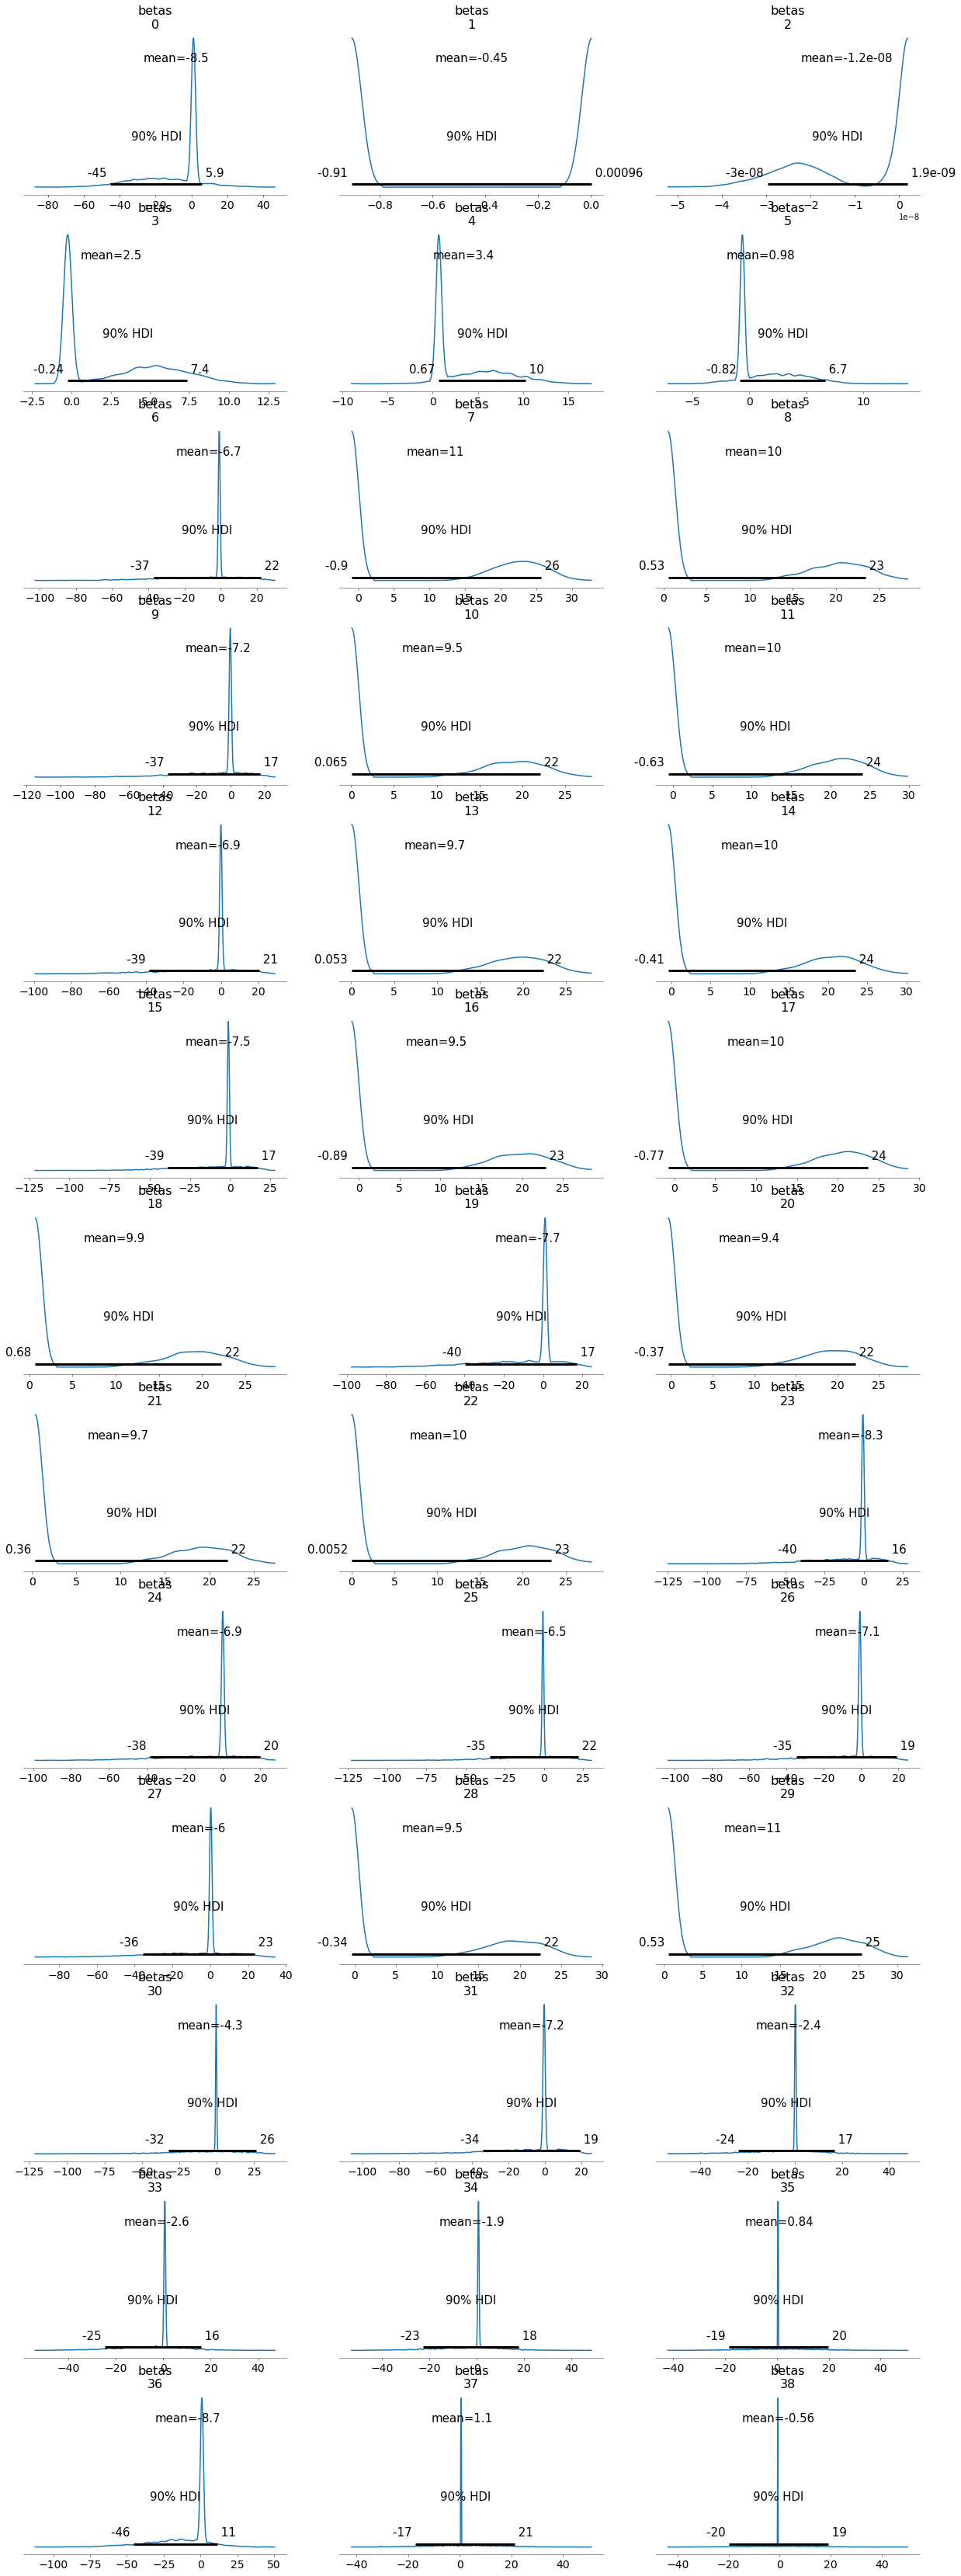

In [44]:
az.plot_posterior(data=private_trace, hdi_prob=0.9)

In [45]:
summary = az.summary(private_trace, hdi_prob=0.9)
summary.index = ["Intercept"] + private_continuous.columns.tolist()[:-2] + private_continuous_dummies.columns.tolist()
summary

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-8.480,16.949,-45.114,5.897,6.560,4.858,8.0,178.0,1.95
Number of Employees,-0.453,0.454,-0.907,0.001,0.320,0.271,3.0,29.0,1.89
Money Raised,-0.000,0.000,-0.000,0.000,0.000,0.000,3.0,57.0,1.83
sp_change_30_days,2.548,3.229,-0.242,7.361,2.017,1.630,3.0,72.0,1.95
sp_change_180_days,3.413,3.780,0.669,10.298,2.002,1.551,4.0,71.0,2.15
sp_change_365_days,0.981,2.659,-0.818,6.673,1.179,0.886,6.0,100.0,1.95
Categories_Aerospace,-6.743,18.199,-37.132,22.390,3.307,3.658,63.0,49.0,1.88
Categories_Construction,10.825,11.979,-0.900,25.677,8.361,7.045,3.0,20.0,2.23
Categories_Consumer,10.457,10.197,0.530,23.376,7.103,5.979,3.0,19.0,2.24
Categories_Crypto,-7.223,17.800,-37.169,17.242,4.697,3.391,20.0,44.0,2.21


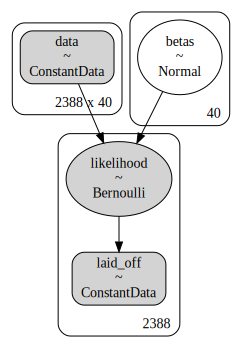

In [ ]:
pm.model_to_graphviz(private_companies_model)

### Public Companies Data

In [ ]:
# Split data into categorical and continuous variables
public_categorical = all_public_companies[["industry"]]
public_continuous = all_public_companies[all_public_companies.columns[~all_public_companies.columns.isin(public_categorical.columns)].tolist()]

In [ ]:
public_continuous_dummies = pd.get_dummies(public_categorical)

In [ ]:
public_continuous.columns, public_continuous_dummies.columns

(Index(['profitMargins', 'revenueGrowth', 'operatingMargins', 'earningsGrowth',
        'currentRatio', 'returnOnAssets', 'returnOnEquity', 'forwardEps',
        'shortRatio', 'beta', 'earningsQuarterlyGrowth', 'payoutRatio',
        'fullTimeEmployees', 'sp_change_30_days', 'sp_change_180_days',
        'sp_change_365_days', 'total_laid_off', 'percentage_laid_off'],
       dtype='object'),
 Index(['industry_Aerospace', 'industry_Construction', 'industry_Consumer',
        'industry_Crypto', 'industry_Data', 'industry_Education',
        'industry_Energy', 'industry_Finance', 'industry_Fitness',
        'industry_Food', 'industry_HR', 'industry_Healthcare',
        'industry_Infrastructure', 'industry_Legal', 'industry_Logistics',
        'industry_Marketing', 'industry_Media', 'industry_Other',
        'industry_Product', 'industry_Real Estate', 'industry_Recruiting',
        'industry_Retail', 'industry_Sales', 'industry_Security',
        'industry_Support', 'industry_Transportation

In [ ]:
public_features = public_continuous.drop(["percentage_laid_off", "total_laid_off"], axis=1)
intercept_coeff = np.ones((len(public_continuous), 1))
public_features = np.hstack((intercept_coeff, public_features.values, public_continuous_dummies.values))
public_features.shape

(1679, 44)

In [ ]:
def to_masked_array(array: np.ndarray):
    temp = array.copy()
    mask = np.isfinite(temp)
    temp[~mask] = -999
    temp = np.ma.masked_values(temp, value=-999)
    return temp

In [ ]:
public_features = to_masked_array(public_features)

In [ ]:
with pm.Model() as public_companies_model:
    X = pm.Data("data", public_features)
    Y = pm.Data("laid_off", np.clip(public_continuous["percentage_laid_off"].values, 0, 1))
    
    betas = pm.Normal("betas", mu=0, tau=0.001, shape=public_features.shape[1])
    
    p = pm.math.dot(X, betas)
    likelihood = pm.Bernoulli("likelihood", logit_p=p, observed=Y)

    public_trace = pm.sample(5000, tune=5000, target_accept=0.95)

/usr/local/lib/python3.8/dist-packages/pymc/data.py:671: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


ERROR:pymc:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.8/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (44) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc45bc63850>,
      dtype=object)

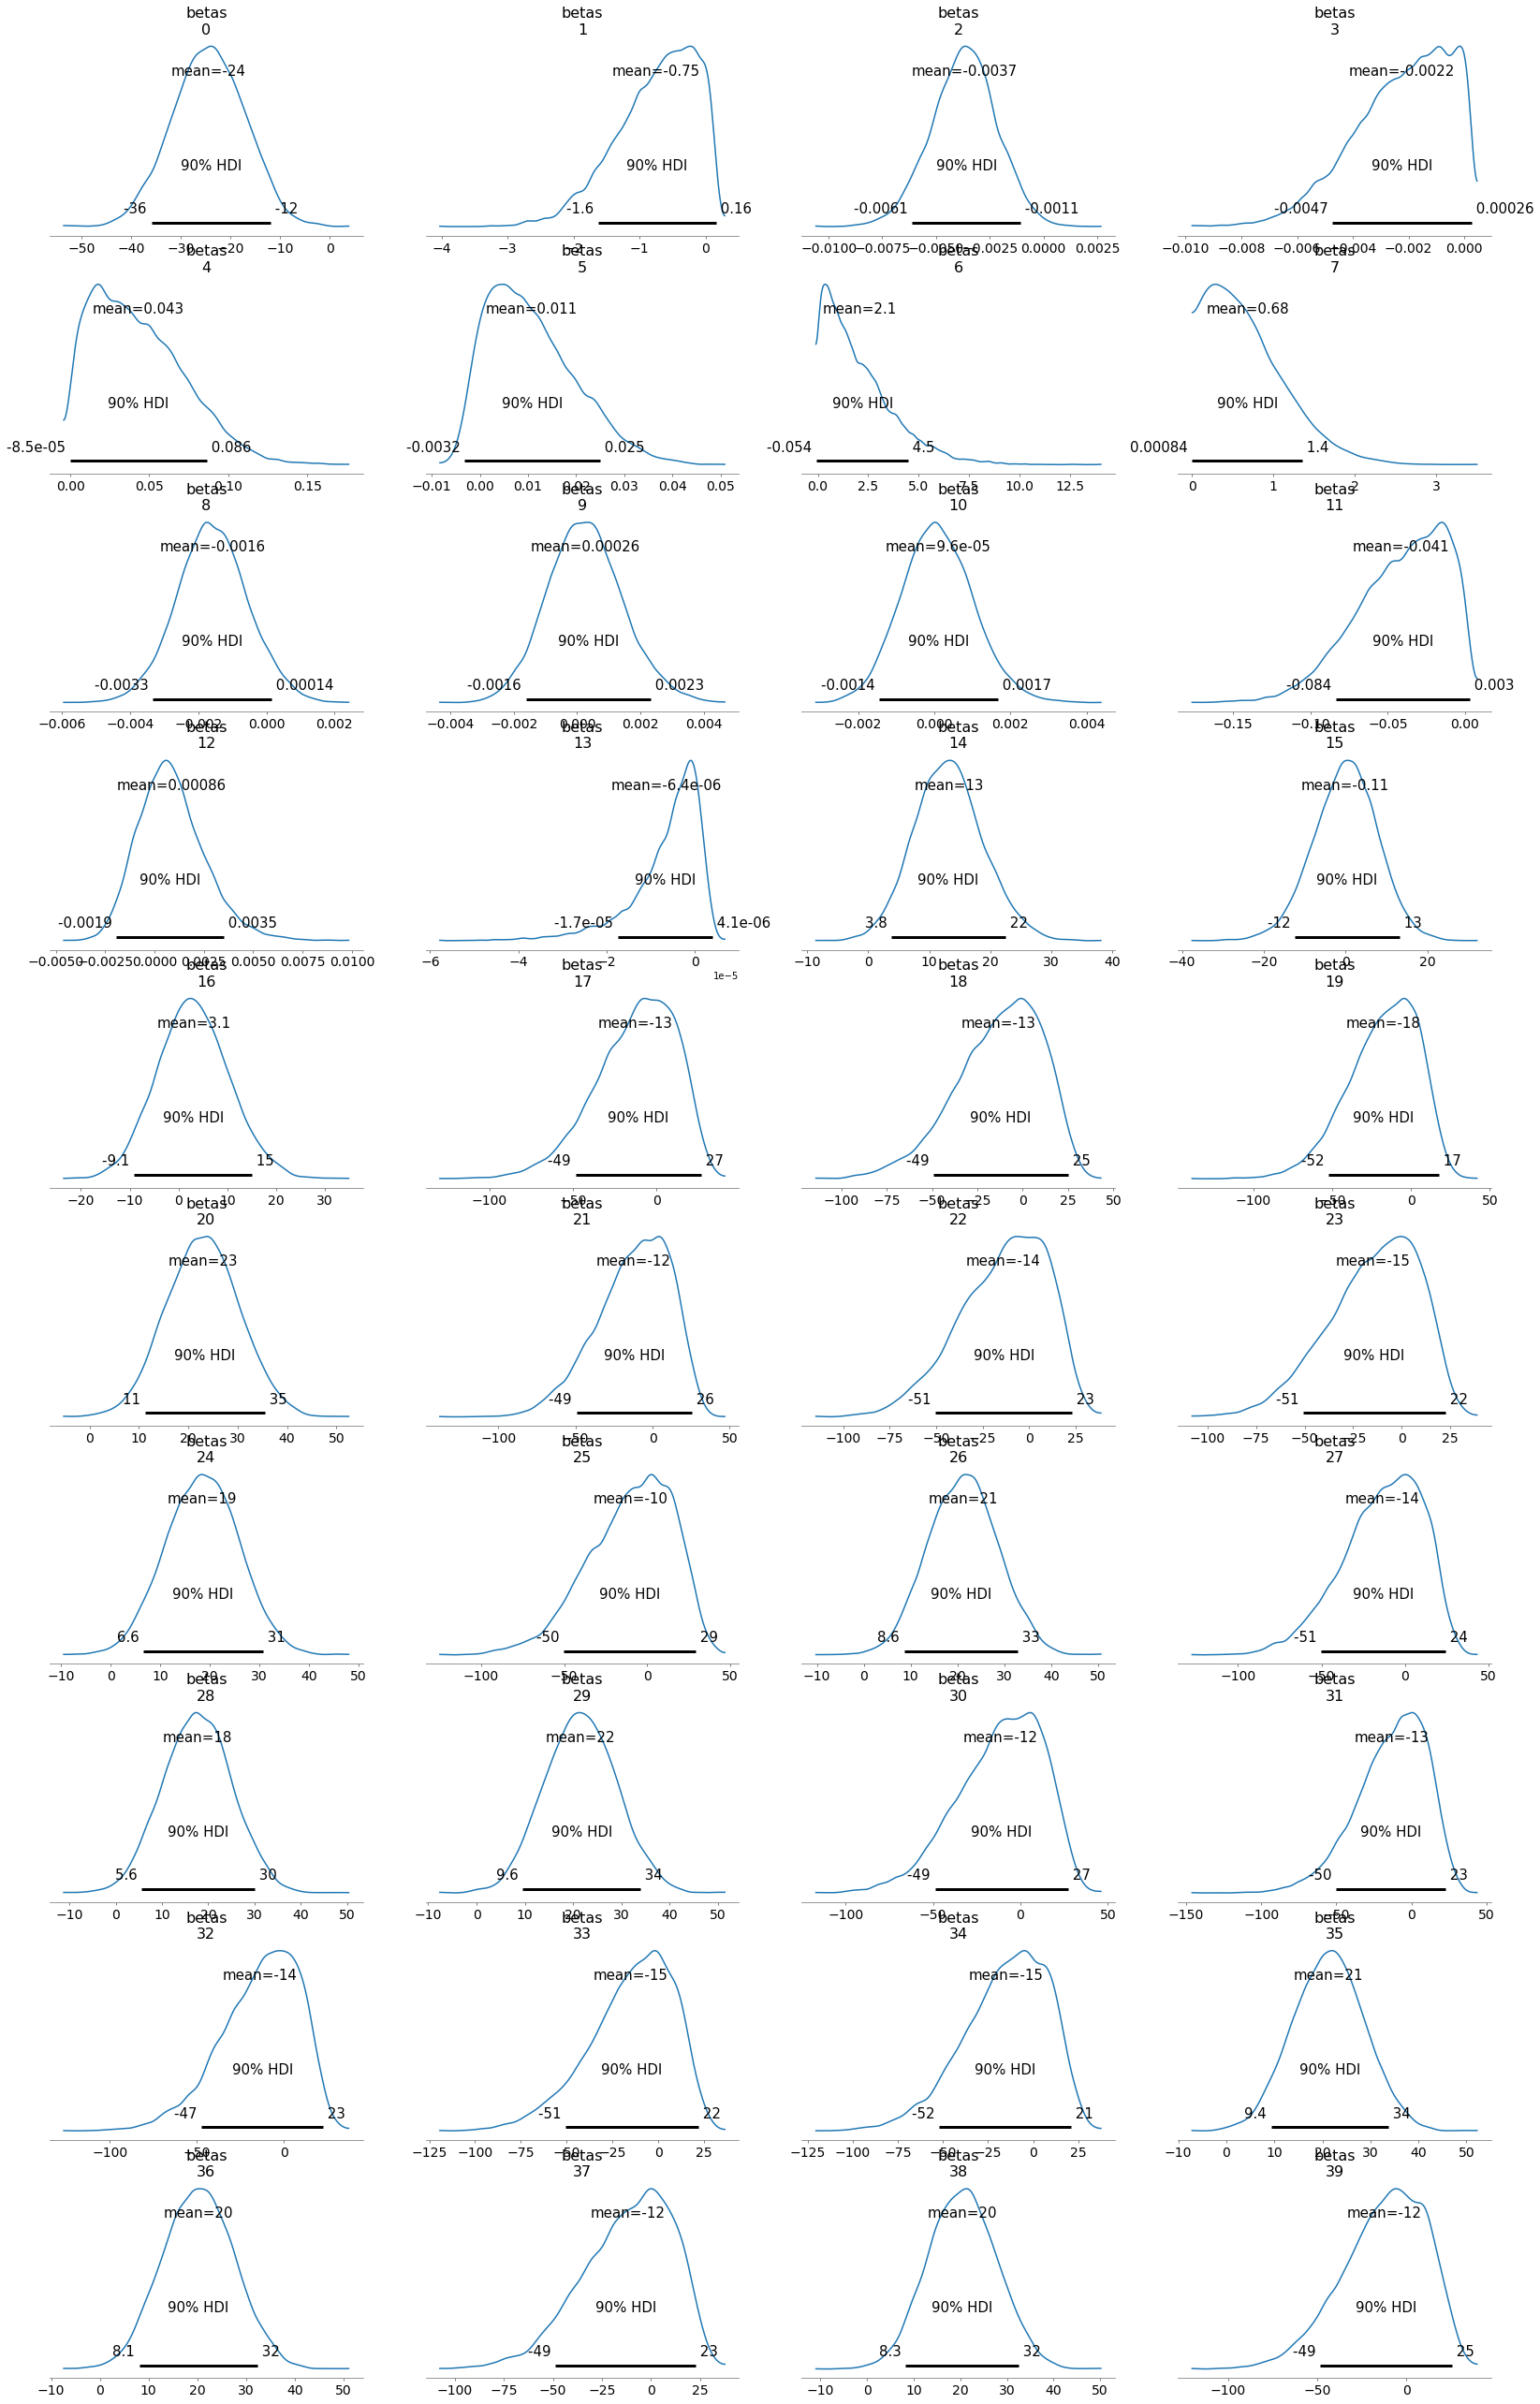

In [ ]:
az.plot_posterior(data=public_trace, hdi_prob=0.9)

In [ ]:
summary = az.summary(public_trace, hdi_prob=0.9)
summary.index = ["Intercept"] + public_continuous.columns.tolist()[:-2] + public_continuous_dummies.columns.tolist()
summary

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-24.370,7.315,-35.908,-11.928,0.411,0.291,317.0,621.0,1.0
profitMargins,-0.747,0.609,-1.633,0.157,0.012,0.009,2773.0,3761.0,1.0
revenueGrowth,-0.004,0.002,-0.006,-0.001,0.000,0.000,3157.0,4490.0,1.0
operatingMargins,-0.002,0.002,-0.005,0.000,0.000,0.000,3995.0,4531.0,1.0
earningsGrowth,0.043,0.029,-0.000,0.086,0.001,0.001,1626.0,2312.0,1.0
currentRatio,0.011,0.009,-0.003,0.025,0.000,0.000,3276.0,3924.0,1.0
returnOnAssets,2.063,1.751,-0.054,4.499,0.037,0.027,2654.0,2972.0,1.0
returnOnEquity,0.682,0.484,0.001,1.358,0.009,0.007,2910.0,3575.0,1.0
forwardEps,-0.002,0.001,-0.003,0.000,0.000,0.000,2445.0,4021.0,1.0
shortRatio,0.000,0.001,-0.002,0.002,0.000,0.000,2400.0,3377.0,1.0
